In [6]:
import platform

print(platform.python_version())
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
#os.environ['KERAS_BACKEND'] = 'tensorflow'
from keras import  backend as K
#K.set_image_dim_ordering('tf')
from keras.preprocessing.image import ImageDataGenerator

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "/Users/zhangchunyu/Downloads/projects/kaggle/digit-recognizer"]).decode("utf8"))

3.6.7
digit_recognizer_keras.ipynb
sample_submission.csv
test.csv
train.csv



In [7]:
train = pd.read_csv("/Users/zhangchunyu/Downloads/projects/kaggle/digit-recognizer/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test= pd.read_csv("/Users/zhangchunyu/Downloads/projects/kaggle/digit-recognizer/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

print(X_train.shape)

(42000, 784)


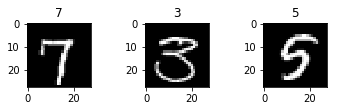

In [12]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [14]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
print(X_train.shape)

X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(X_test.shape)

mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

(42000, 28, 28, 1)
(28000, 28, 28, 1)


10

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


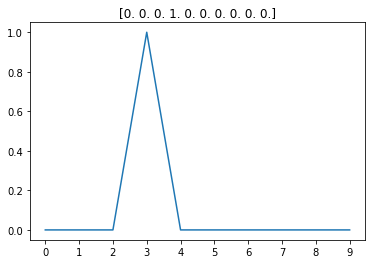

In [15]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10));

In [16]:
seed = 43
np.random.seed(seed)

model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [17]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

from keras.preprocessing import image
gen = image.ImageDataGenerator()


In [19]:
from sklearn.model_selection import train_test_split
X = X_train
print(X[0].ndim)
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
print(type(X_train))
print(X_train[0].ndim)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3, 
                    validation_data=val_batches, validation_steps=val_batches.n)

3
<class 'numpy.ndarray'>
3
Epoch 1/3
37800/37800 [==============================] - 96s 3ms/step - loss: 0.2401 - acc: 0.9342 - val_loss: 0.3307 - val_acc: 0.9107
Epoch 2/3
37800/37800 [==============================] - 98s 3ms/step - loss: 0.2157 - acc: 0.9417 - val_loss: 0.3473 - val_acc: 0.9126
Epoch 3/3
37800/37800 [==============================] - 99s 3ms/step - loss: 0.2098 - acc: 0.9437 - val_loss: 0.3754 - val_acc: 0.9074


In [20]:
history_dict = history.history
history_dict

{'val_loss': [0.33068617875848755, 0.34728057897258086, 0.3753869273649339],
 'val_acc': [0.9107479572453133, 0.9125957854495338, 0.907392026586993],
 'loss': [0.24004227983944262, 0.21570765235012374, 0.20979891829035593],
 'acc': [0.9342288996803931, 0.9416986810436337, 0.9436997862407296]}

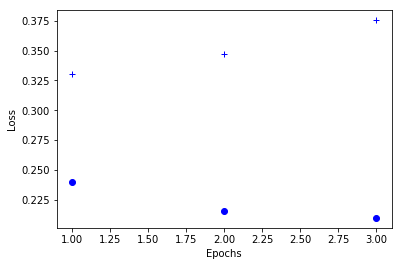

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

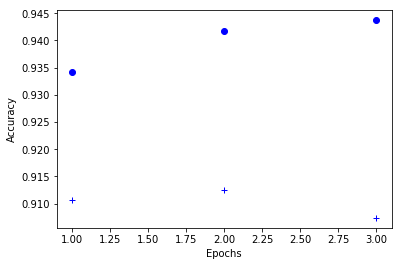

In [22]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [24]:
def get_fc_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(optimizer='Adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

fc = get_fc_model()
fc.optimizer.lr=0.01

In [25]:
history=fc.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/3
37800/37800 [==============================] - 204s 5ms/step - loss: 0.1710 - acc: 0.9717 - val_loss: 0.4844 - val_acc: 0.9564
Epoch 2/3
37800/37800 [==============================] - 211s 6ms/step - loss: 0.1895 - acc: 0.9813 - val_loss: 0.5806 - val_acc: 0.9583
Epoch 3/3
37800/37800 [==============================] - 225s 6ms/step - loss: 0.2334 - acc: 0.9818 - val_loss: 0.6784 - val_acc: 0.9550


In [26]:
history_dict = history.history
history_dict

{'val_loss': [0.48440696945712153, 0.5805671007273057, 0.6783687422698369],
 'val_acc': [0.9564140552815923, 0.9583108836652933, 0.9549886265073904],
 'loss': [0.17091882462928756, 0.1894035559981298, 0.23345424112803406],
 'acc': [0.9716726559252162, 0.9812885496163033, 0.9818287404744789]}

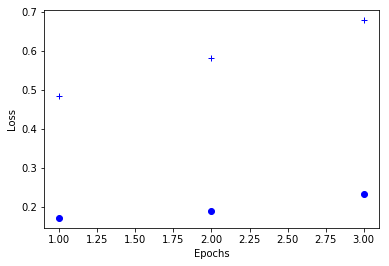

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

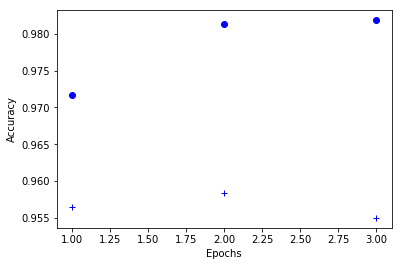

In [28]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [29]:
from keras.layers import Convolution2D, MaxPooling2D

def get_cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        Convolution2D(64,(3,3), activation='relu'),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [30]:
model= get_cnn_model()
model.optimizer.lr=0.01
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)
# the result is not as good as the sample net, why?

Epoch 1/1
37800/37800 [==============================] - 5325s 141ms/step - loss: 0.0709 - acc: 0.9821 - val_loss: 0.1751 - val_acc: 0.9755


In [31]:
gen =ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches = gen.flow(X_val, y_val, batch_size=64)

In [32]:
model.optimizer.lr=0.001
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/1
37800/37800 [==============================] - 5164s 137ms/step - loss: 0.1254 - acc: 0.9639 - val_loss: 0.1366 - val_acc: 0.9649


In [33]:
from keras.layers.normalization import BatchNormalization

def get_bn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [34]:
model= get_bn_model()
model.optimizer.lr=0.01
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, 
                    validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/1
37800/37800 [==============================] - 18265s 483ms/step - loss: 0.0363 - acc: 0.9899 - val_loss: 0.0456 - val_acc: 0.9911


In [35]:
predictions = model.predict_classes(X_test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("/Users/zhangchunyu/Downloads/projects/kaggle/digit-recognizer/DR.csv", index=False, header=True)